In [1]:
import numpy as np
import pandas as pd
import cobra
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from cobra import Model, Reaction, Metabolite

### Chinese hamster ovary cells

Chinese hamster ovary (CHO) cells are the powerhouses for the production of many drugs, for example, those used to treat Parkinson's Disease, cancers and Alzheimer's (Xu et al, 2023, PMID: 36648523). Genome-scale models are a popular platform for predicting metabolic signatures of cells under particular environmental conditions, but how well do these models replicate the actual biological priorities and adaptive evolution of cells? One approach to evaluate this is through exploring the objective function. But, before we do this, we need to understand the different reactions which the genome-scale models contain, and how these are structured and organised within the model.

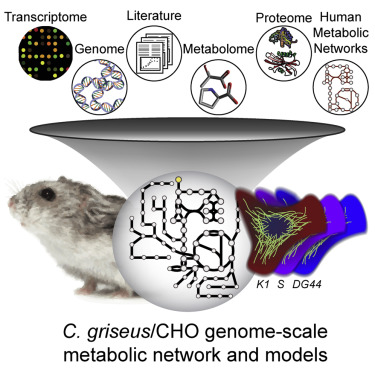

Image from PMID: 27883890

#### 1. Load comprehensive genome-scale models (iCHO2291 and updated iCHO2441)

Depending on what's easier for your report, you can work directly on the CHO GEM from 2020 (iCHO2291: https://www.ebi.ac.uk/biomodels/MODEL1912180001), which has been assigned to 'model_original' below. Alternatively, you can work on the iCHO2441 model from 2023 (the most recent CHO GEM), which the post-doc before me updated with the metabolic subsystems (e.g. 'transport reactions' or 'lipid metabolism' etc) from the iCHO2291 model (assigned to 'model_updated below).

In [7]:
# model_updated = read_sbml_model('iCHO2441_221-107_producing.xml') - switch between this line and the next to change model :)
model_original = read_sbml_model('iCHO2291.xml')
model_original

Name,iCHO2291
Memory address,2dbb9517950
Number of metabolites,3972
Number of reactions,6236
Number of genes,2291
Number of groups,15
Objective expression,1.0*biomass_cho - 1.0*biomass_cho_reverse_073b2
Compartments,"Cytoplasm, Lysosome, Mitochondrion, Endoplasmic_reticulum, Nucleus, Extracellular, Peroxisome, Golgi"


### 2. Study the metabolic subsystem organisation of models

I couldn't find a good image describing the central metabolic subsystems of CHO cells, but here is a figure (PMID: 35741058) which shows you the changes in CHO metabolism over its time in culture. The cells shift from a phase of exponential growth (where metabolism favours maximal growth), to production of their recombinant protein (what we isolate to make drugs) to the stationary/death phase where there are too many cells in too small of a space and not enough feed to keep them alive, so they die:

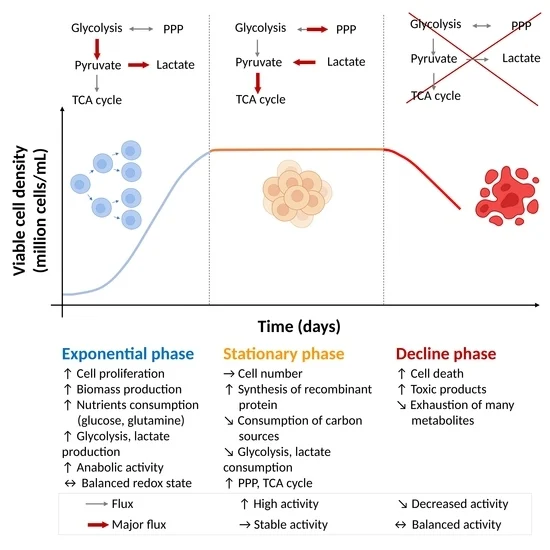

Print the 'groups' (a.k.a subsystems) of the model and see how many reactions are assigned to each subsystem

In [16]:
for g in model_original.groups:
    print(g.name,'; number of reactions in subsystem:',len(g.members))

Amino acid metabolism ; number of reactions in subsystem: 381
Bile, eicosanoid and steroid metabolism ; number of reactions in subsystem: 212
Biomass synthesis ; number of reactions in subsystem: 47
Central carbon and energy metabolism ; number of reactions in subsystem: 93
Exchange/demand/sink reaction ; number of reactions in subsystem: 649
Fatty acid metabolism ; number of reactions in subsystem: 728
Glycan and glycosaminoglycan metabolism ; number of reactions in subsystem: 497
Glycerophospholipid, sphingolipid and inositol metabolism ; number of reactions in subsystem: 289
Miscellaneous ; number of reactions in subsystem: 324
Nucelotide metabolism ; number of reactions in subsystem: 288
Other carbon metabolism ; number of reactions in subsystem: 158
Transport ; number of reactions in subsystem: 2245
Unassigned ; number of reactions in subsystem: 63
Vitamin and cofactor metabolism ; number of reactions in subsystem: 217
Xenobiotics metabolism ; number of reactions in subsystem: 45


Another way to do this is to print the individual reaction and find its subsystem, but this gives a very long list to look through!

In [19]:
for r in model_original.reactions:
    print(r.id,':',r.subsystem) #here we use the term 'subsystem' instead of group

10FTHF5GLUtl : Transport
10FTHF5GLUtm : Transport
10FTHF6GLUtl : Transport
10FTHF6GLUtm : Transport
10FTHF7GLUtl : Transport
10FTHF7GLUtm : Transport
10FTHFtl : Transport
10FTHFtm : Transport
11DOCRTSLtm : Transport
11DOCRTSLtr : Transport
11DOCRTSTRNtm : Transport
11DOCRTSTRNtr : Transport
13DAMPPOX : Miscellaneous
1a_24_25VITD2Hm : Vitamin and cofactor metabolism
1a_24_25VITD3Hm : Vitamin and cofactor metabolism
1a_25VITD2Hm : Vitamin and cofactor metabolism
1a_25VITD3Hm : Vitamin and cofactor metabolism
1a25DHVITD3TRn : Transport
1MNCAMti : Transport
1PPDCRp : Amino acid metabolism
24_25DHVITD2t : Transport
24_25DHVITD2tm : Transport
24_25DHVITD3t : Transport
24_25DHVITD3tm : Transport
24_25VITD2Hm : Vitamin and cofactor metabolism
24_25VITD3Hm : Vitamin and cofactor metabolism
24NPHte : Transport
25HVITD2t : Transport
25HVITD2tm : Transport
25HVITD3c : Vitamin and cofactor metabolism
25HVITD3t : Transport
25HVITD3tm : Transport
25VITD2Hm : Vitamin and cofactor metabolism
25VITD3Hm 

Although as this project develops we may find reactions in an unbiased way which are important for the objective function, Since York and we are interested in glycan metabolism, let's scan the iCHO2291 model to see which reactions are included in the glycan metabolism subsystem:

In [24]:
for r in model.reactions:
    if r.subsystem == 'Glycan and glycosaminoglycan metabolism':
        print(r)

A_MANASE: 2.0 h2o[c] + m2mn[c] --> 2.0 man[c] + mn[c]
A_MANASEly: 2.0 h2o[l] + m2mn[l] --> 2.0 man[l] + mn[l]
A4GNT1g: T_antigen[g] + uacgam[g] --> gncore1[g] + h[g] + udp[g]
A4GNT2g: core2[g] + uacgam[g] --> gncore2[g] + h[g] + udp[g]
ABO1g: fucgalacglcgalgluside_cho[g] + udpacgal[g] --> acgalfucgalacglcgalgluside_cho[g] + h[g] + udp[g]
ABO2g: fucgalacglcgalgluside_cho[g] + udpgal[g] --> galfucgalacglcgalgluside_cho[g] + h[g] + udp[g]
ABO3g: fuc12gal14acglcgalgluside_cho[g] + udpgal[g] --> galfuc12gal14acglcgalgluside_cho[g] + h[g] + udp[g]
ABO4g: fuc12gal14acglcgalgluside_cho[g] + udpacgal[g] --> acgalfuc12gal14acglcgalgluside_cho[g] + h[g] + udp[g]
ABO5g: fucgalacgalfuc12gal14acglcgalgluside_cho[g] + udpacgal[g] --> acgalfucgalacgalfuc12gal14acglcgalgluside_cho[g] + h[g] + udp[g]
ABO6g: fucgalacglcgal14acglcgalgluside_cho[g] + udpacgal[g] --> acgalfucgalacglcgal14acglcgalgluside_cho[g] + h[g] + udp[g]
ABO7g: fucgalacgalfucgalacglcgal14acglcgalgluside_cho[g] + udpacgal[g] --> acgalfu

If we wanted to understand the metabolites in these reactions we could print something like this:

In [29]:
for r in model.reactions:
    if r.subsystem == 'Glycan and glycosaminoglycan metabolism':
        print(r.id)
        for m in r.metabolites:
            print(m.name)
        print('\n')

A_MANASE
H2O
(alpha-D-mannosyl)2-beta-D-mannosyl-N-acetylglucosamine
D-Mannose
beta-1,4-mannose-N-acetylglucosamine


A_MANASEly
H2O
(alpha-D-mannosyl)2-beta-D-mannosyl-N-acetylglucosamine
beta-1,4-mannose-N-acetylglucosamine
D-Mannose


A4GNT1g
UDP-N-acetyl-alpha-D-glucosamine(2-)
T antigen (core 1)
proton
UDP
GlcNAc-alpha-1,4-Core 1


A4GNT2g
UDP-N-acetyl-alpha-D-glucosamine(2-)
Core 2
proton
UDP
GlcNAc-alpha-1,4-Core 2


ABO1g
UDP-N-acetyl-D-galactosamine(2-)
Type IH glycolipid
proton
UDP
Type IA glycolipid


ABO2g
UDP-D-galactose(2-)
Type IH glycolipid
proton
UDP
Type IB glycolipid


ABO3g
UDP-D-galactose(2-)
Type IIH glycolipid
proton
UDP
(Gal)3 (Glc)1 (GlcNAc)1 (LFuc)1 (Cer)1


ABO4g
UDP-N-acetyl-D-galactosamine(2-)
Type IIH glycolipid
proton
UDP
(Gal)2 (GalNAc)1 (Glc)1 (GlcNAc)1 (LFuc)1 (Cer)1


ABO5g
UDP-N-acetyl-D-galactosamine(2-)
Type IIIH glycolipid
proton
UDP
Type IIIA glycolipid


ABO6g
UDP-N-acetyl-D-galactosamine(2-)
VI2Fuc-nLc6
proton
UDP
(Gal)3 (GalNAc)1 (Glc)1 (GlcNA

### 3. Explore subsystems further and compare to other models

#### Options for further work:

##### a) Explore other subsystems within iCHO2291 and other models
##### b) Identify some of the most important metabolites in the glycan metabolism network, for example UDPGlcNAc is an important metabolite in N-linked glycosylation, and find their corresponding reaction with these models (PMID: 36610518 is a good reference)
##### c) Compare the organisation of iCHO2291 with the reduced CHO GEM (CHOmpact; I have uploaded onto my Github for you) (PMID: 37272445) and see if the same subsystems and reactions are represented
##### d) Explore how the distribution of the model reactions (e.g. uptake and secretion as in first tutorial...) change when FBA is solved for an objective function within glycan metabolism compared with biomass maximisation
##### e) Based on literature, which stage of CHO culture would you expect cells to be focussing their metabolism more towards glycan metabolism, and where would they be focussing it more towards growth? (obviously this is a simplification of cell metabolism to say this and they don't 'know' what they're focussing on!)